In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('all_month.csv')
print(data.head()) # we use this to see the first few rows of the dataframe

In [79]:
data_i = data.set_index('time') #set the time as the index
data_i

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
time,,,,,,,,,,,,,,,,,,,,,
2024-01-18T02:18:19.690Z,38.807835,-122.823334,2.03,1.49,md,21.0,54.0,0.004681,0.02,nc,...,2024-01-18T02:19:54.732Z,"7 km WNW of The Geysers, CA",earthquake,0.22,0.310,0.150,22.0,automatic,nc,nc
2024-01-18T02:16:52.710Z,38.808498,-122.823669,2.01,1.33,md,23.0,53.0,0.004320,0.02,nc,...,2024-01-18T02:28:11.196Z,"7 km WNW of The Geysers, CA",earthquake,0.19,0.340,0.140,23.0,automatic,nc,nc
2024-01-18T01:55:45.006Z,64.994500,-147.409700,5.20,1.50,ml,NaN,NaN,NaN,0.60,ak,...,2024-01-18T02:03:52.136Z,"10 km ENE of Fox, Alaska",earthquake,NaN,0.300,NaN,NaN,automatic,ak,ak
2024-01-18T01:48:21.130Z,36.020333,-117.781167,1.55,1.39,ml,27.0,62.0,0.013780,0.16,ci,...,2024-01-18T01:54:25.834Z,"15 km NE of Little Lake, CA",earthquake,0.17,0.160,0.139,11.0,automatic,ci,ci
2024-01-18T01:46:32.440Z,38.826668,-122.853836,2.44,0.28,md,10.0,99.0,0.002529,0.01,nc,...,2024-01-18T02:04:12.038Z,"10 km WNW of The Geysers, CA",earthquake,0.40,1.070,0.160,11.0,automatic,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-19T02:43:10.876Z,-7.242500,119.138700,593.76,4.90,mb,95.0,26.0,2.074000,0.75,us,...,2024-01-16T01:30:21.040Z,"142 km NNE of Bima, Indonesia",earthquake,3.86,6.268,0.054,107.0,reviewed,us,us
2023-12-19T02:42:29.472Z,-22.785000,172.366200,10.00,5.30,mww,64.0,74.0,4.546000,0.74,us,...,2024-01-15T23:45:16.040Z,southeast of the Loyalty Islands,earthquake,10.15,1.808,0.075,17.0,reviewed,us,us
2023-12-19T02:39:21.180Z,33.111333,-115.624833,9.51,1.34,ml,32.0,93.0,0.066410,0.19,ci,...,2023-12-19T15:49:01.616Z,"8 km N of Westmorland, CA",earthquake,0.21,0.520,0.214,20.0,reviewed,ci,ci


In [22]:
data_i = data.set_index('time').sort_index(ascending = True)

In [80]:
print(data_i.head())
print(data_i.tail())

                           latitude   longitude  depth   mag magType   nst  \
time                                                                         
2024-01-18T02:18:19.690Z  38.807835 -122.823334   2.03  1.49      md  21.0   
2024-01-18T02:16:52.710Z  38.808498 -122.823669   2.01  1.33      md  23.0   
2024-01-18T01:55:45.006Z  64.994500 -147.409700   5.20  1.50      ml   NaN   
2024-01-18T01:48:21.130Z  36.020333 -117.781167   1.55  1.39      ml  27.0   
2024-01-18T01:46:32.440Z  38.826668 -122.853836   2.44  0.28      md  10.0   

                           gap      dmin   rms net  ...  \
time                                                ...   
2024-01-18T02:18:19.690Z  54.0  0.004681  0.02  nc  ...   
2024-01-18T02:16:52.710Z  53.0  0.004320  0.02  nc  ...   
2024-01-18T01:55:45.006Z   NaN       NaN  0.60  ak  ...   
2024-01-18T01:48:21.130Z  62.0  0.013780  0.16  ci  ...   
2024-01-18T01:46:32.440Z  99.0  0.002529  0.01  nc  ...   

                                       

In [26]:
# remove rows with any missing values and compare
data_clean = data_i.dropna()
print(f'before {data_i.shape}')
print(f'after {data_clean.shape}')

before (8886, 21)
after (5210, 21)


In [40]:
# now we have a clean data set, lets get a feel for it using describe.
data_clean.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000
mean,32.340939,-89.014448,19.816001,1.826192,26.506718,98.038040,0.620557,0.224485,1.842194,2.591889,0.167749,20.208637
std,16.710762,77.084788,60.510299,1.395737,24.587807,56.481182,2.342621,0.261532,3.163763,5.484128,0.090970,33.018945
min,-65.494800,-179.957700,-3.160000,-0.930000,3.000000,12.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000
25%,31.707250,-122.762497,2.560000,0.830000,12.000000,60.000000,0.011060,0.050000,0.240000,0.480000,0.100000,8.000000
50%,36.698333,-116.784250,7.031300,1.360000,19.000000,82.000000,0.056275,0.140000,0.430000,0.809565,0.154000,13.000000
75%,38.833000,-104.134000,11.369000,2.340000,33.000000,121.000000,0.148600,0.227500,1.108058,1.851750,0.202000,22.000000
max,80.512900,179.877200,660.826000,7.500000,598.000000,343.000000,43.556000,1.600000,17.780000,31.610000,0.854745,722.000000


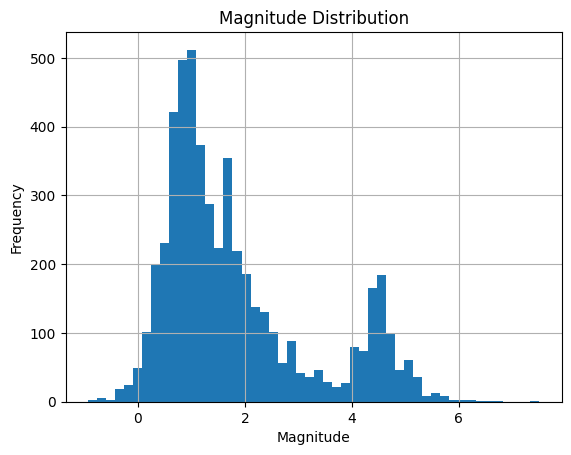

In [41]:
import matplotlib.pyplot as plt

data_clean['mag'].hist(bins=50)
plt.title('Magnitude Distribution')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()


Histogram above shows majority of earthquakes during the 24 hour period were between 2 and 6 of magnitude, withoutliers above 6.

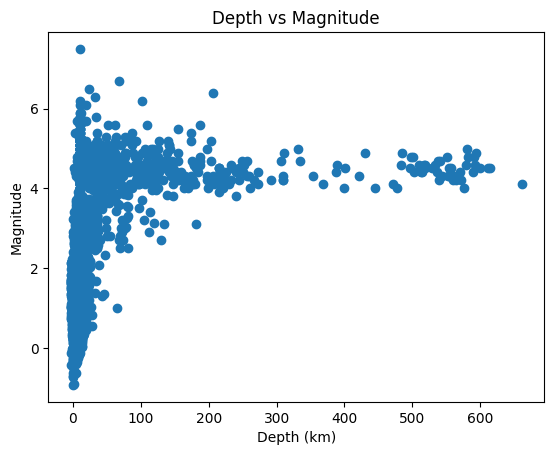

In [42]:
plt.scatter(data_clean['depth'], data_clean['mag'])
plt.title('Depth vs Magnitude')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()


Scatter plot shows great variance at shallow depth and more consitency from 100m and deeper. 

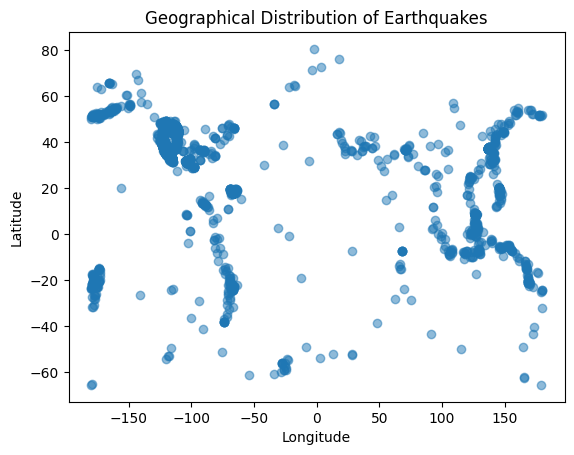

<Figure size 640x480 with 0 Axes>

In [63]:
plt.scatter(data_clean['longitude'], data_clean['latitude'], alpha=0.5)
plt.title('Geographical Distribution of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
import seaborn as sns

correlation_matrix = data_clean.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()


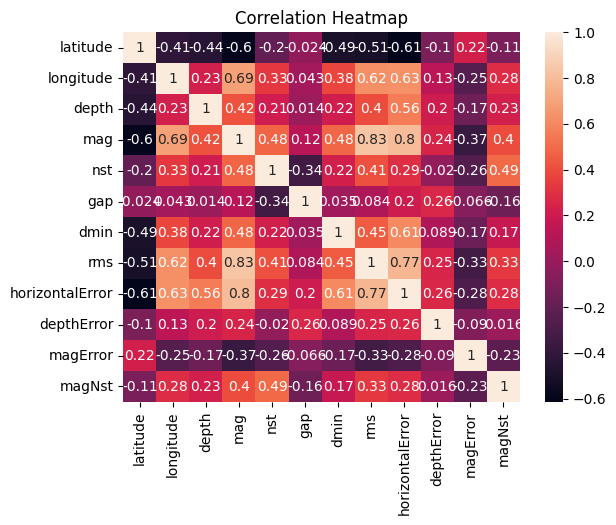

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# select only the numerical columns for correlation
numerical_data = data_clean.select_dtypes(include=[np.number])

# calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Ccreate a heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()


Correlation Heatmap

Looking for high correlations and trying to validate them.

rms =   rootmeansquare measures the magnitude of a varying quantity and for eathquakes this is the rms of the seismic signal associated with the earhquake as recorded by seismographs
        in this case that means the rms value measures seismic noise, indicating  how 'clean' a signal is which affects the measurement accuracy. the higher rms number the more noise and less accuracy.
mag =   magnitude of the earthquake, exponential

in this case the 0.83 between rms|mag makes sense because the higher the magnitude of earthquake, the more violent it is causing all sorts of interferance with the instruments at the station

similarly, rms|horizontalError also have a high correlation of 0.77 indicating...

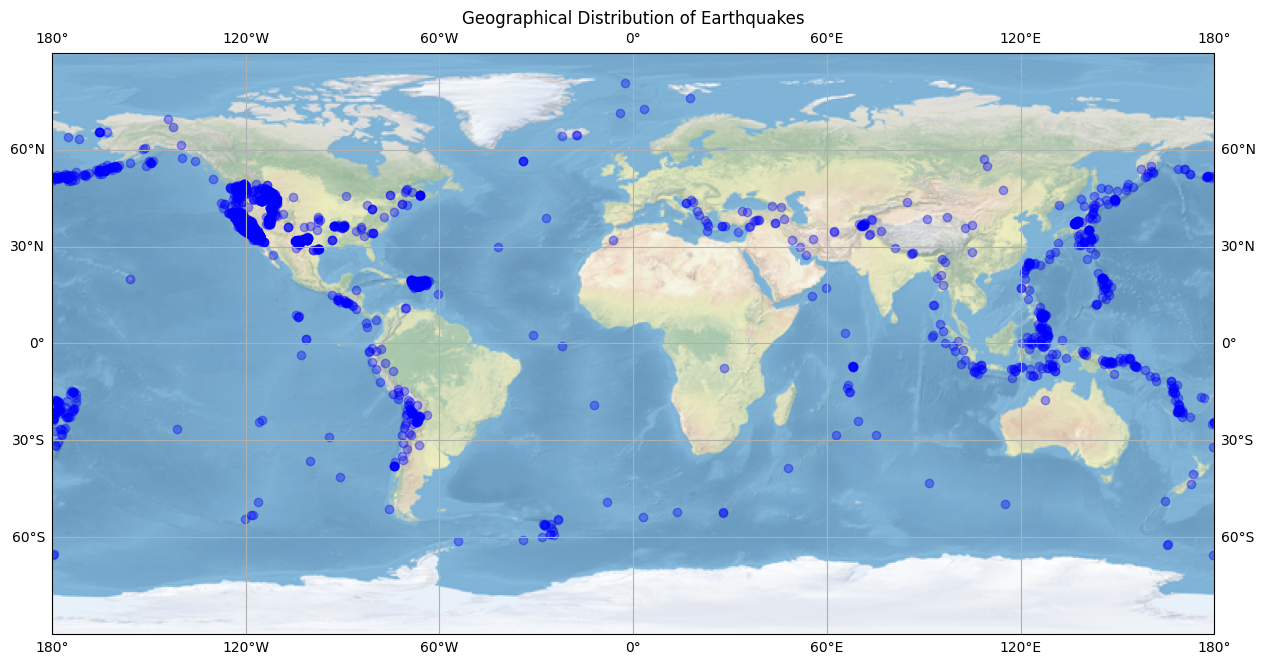

In [78]:
import cartopy.crs as ccrs

#Create a plot with a specific projection
plt.figure(figsize=(15, 15)) #set size
ax = plt.axes(projection=ccrs.PlateCarree()) #function from cartopy that superimposes the plot over an img 
ax.stock_img()  # Add a stock image of the world map

#plotting earthquake data
plt.scatter(data_clean['longitude'], data_clean['latitude'], alpha=0.35, color='blue', marker='o')

# adding gridlines, labels, and title
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.title('Geographical Distribution of Earthquakes')

# Show the plot
plt.show()


Superimposing the map coordinates over a map of the world adds another layer of information to the plot. The locations of the recorded earthquakes indicates where tectonic plates meet and gives an idea of their shape.

BELOW IS EXPERIMENTING

In [ ]:
#instead of discarding NaN rows entirely, we can create a new dataframe to analyse the rows that were inadquate for analysis, and perhaps offer
#some analysis as to why the data was missing in the first place, just for fun

inadequate_data = data_i[data_i.isna().any(axis=1)]
inadequate_data

''' 
--  data_i.isna() creates a boolean DataFrame where True represents missing values.
--  any(axis=1) checks each row for any True values (i.e., any missing values in the row).
--  data_i[...] filters the original DataFrame to only include those rows with missing values.
'''

In [29]:
# Check for columns without any NaN values
no_nan_columns = data_i.columns[~data_i.isna().any()]

#print the columns that have no NaN values
print(no_nan_columns)

''' 
--  data_i.isna() creates a boolean DataFrame where True represents missing values.
--  any() is used to check each column for any True values (i.e., any missing values in the column). 
    It returns a boolean Series where True indicates the presence of missing values in a column.
--  ~ is a logical NOT operator, used here to invert the boolean Series, so True becomes False and vice versa. 
    This inverts our criteria to look for columns without any missing values.
--  data_i.columns[...] selects the column names from the original DataFrame where the condition is met (i.e., no NaN values are present).
'''

# with the print below, we now know which columns are populated fully and deduce the columns with no values

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'rms', 'net', 'id',
       'updated', 'place', 'type', 'depthError', 'status', 'locationSource',
       'magSource'],
      dtype='object')


In [30]:
# Columns with missing data
missing_data_columns = data_i.columns[data_i.isna().any()]
print("Columns with missing data:", missing_data_columns)

''' 
no point looking for any correlation unless we understand what the column headers mean.
    nst             -   number of seismic stations that recorded the earthquake
    gap             -   Azimuthal Gap, the largest angle between adjecent stations
    dmin            -   Minimum Distance, min horizontal distance from epicenter to nearest st, degrees
    horizontalError -   uncertainty associated with location of eq (long/latitude), km
    magError        -   +/- error in magnitude
    magNst          -   Number of Stations Reporting Magnitude, similar to nst but specifically ofr the number of st's used to calculate magnitude

initially it seems that some of the NaN values are because of lack of information from st's.

    
    '''

Columns with missing data: Index(['nst', 'gap', 'dmin', 'horizontalError', 'magError', 'magNst'], dtype='object')
